In [1]:
from files.utils.constants import *
from files.utils.utility_functions import *


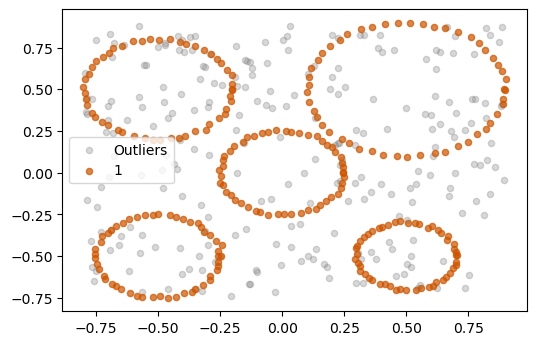

In [2]:
ds, gt = load_dataset_by_name(
    base_path="/home/catonz/Neural-PreferenceIsolation/", name="circle5")
plot_clusters(gt, ds)
x = np.linspace(np.min(ds[:, 0]), np.max(ds[:, 1]), len(ds))


In [19]:
from files.pif.pif import *

params = {
            "mss":2,
            "num_models": 500,
            "training_epochs": 300,
            "AE_structure": 
                {
                    "neurons": [2, 4, 2], 
                    "activation": torch.tanh
                }
            }

sac = PreferenceIsolationForest(data=ds, model_name=AE)
models_ithrs = sac.build_models(params=params)


--------------------------------------------------
Building RanSac models
Iteration 500/500: [==============================] (100%) ETA: 0:01:16.825412


Anomaly Detection
--------------------------------------------------
Not building models Pool because already generated.
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Building Voronoi Forest
--------------------------------------------------
Done


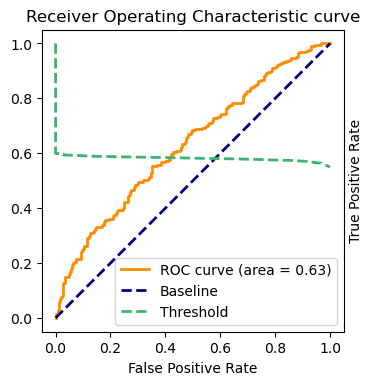

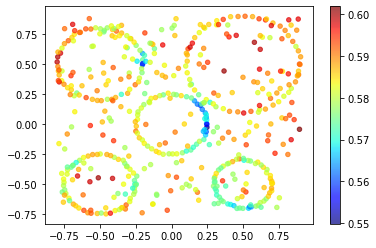

In [20]:
scores = sac.anomaly_detection(in_th=0.01)
make_roc(gt, scores=scores)

plot(ds, c=scores, cmap="jet")
plt.colorbar()


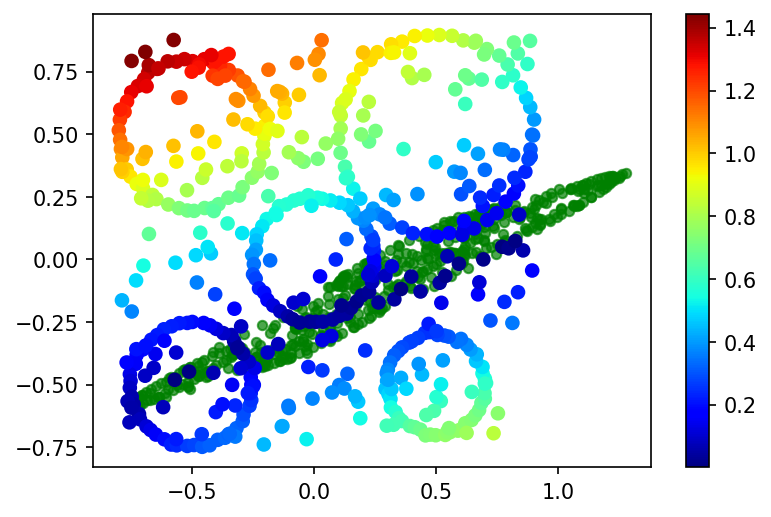

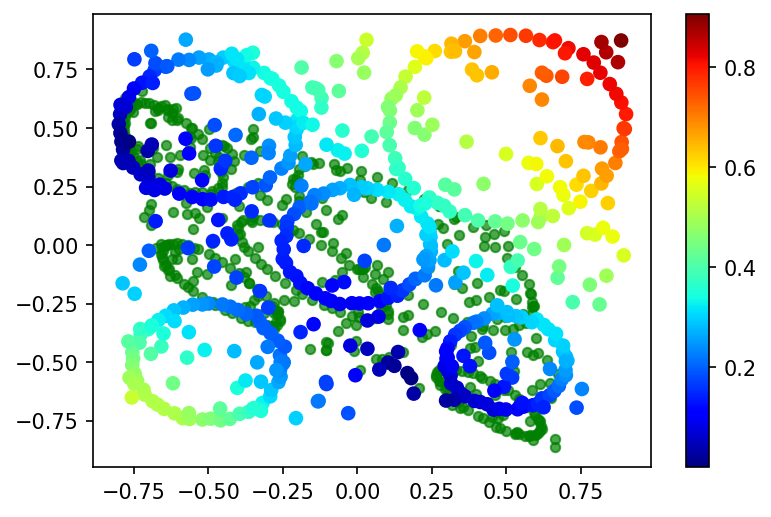

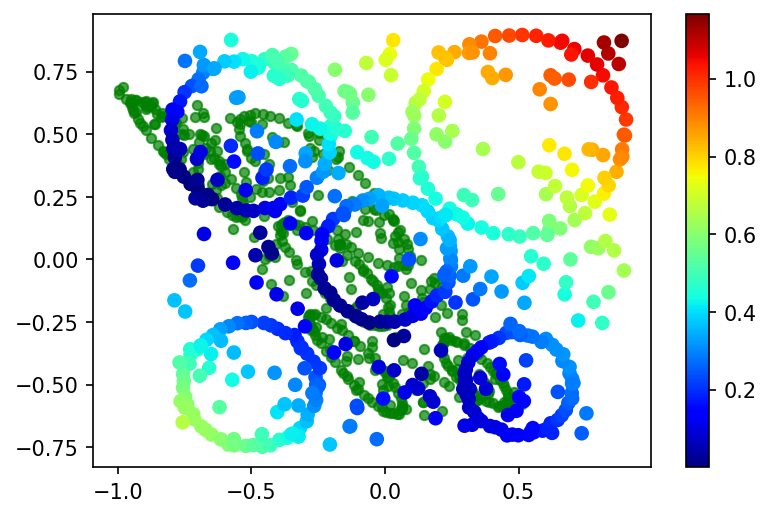

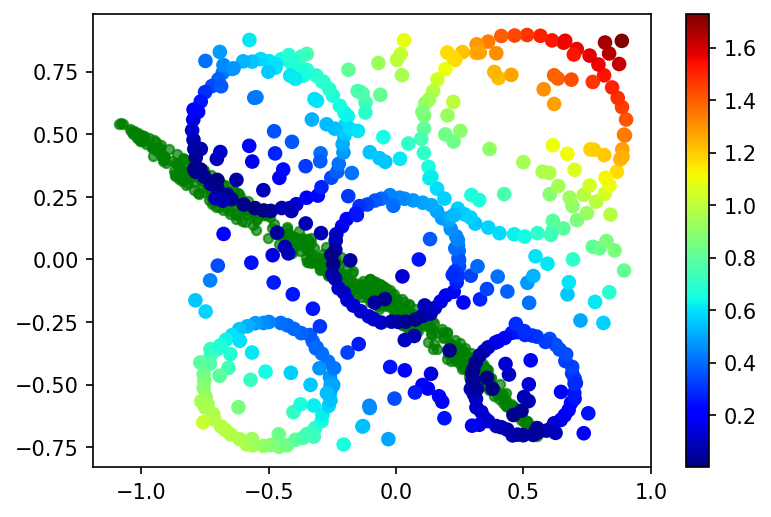

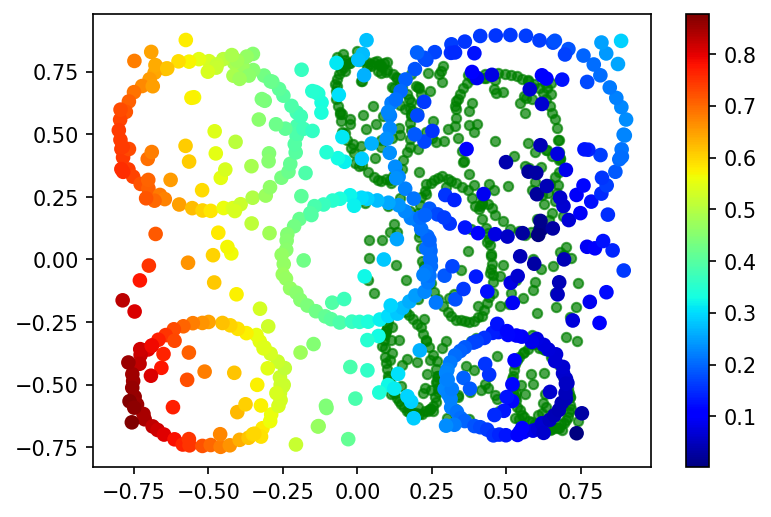

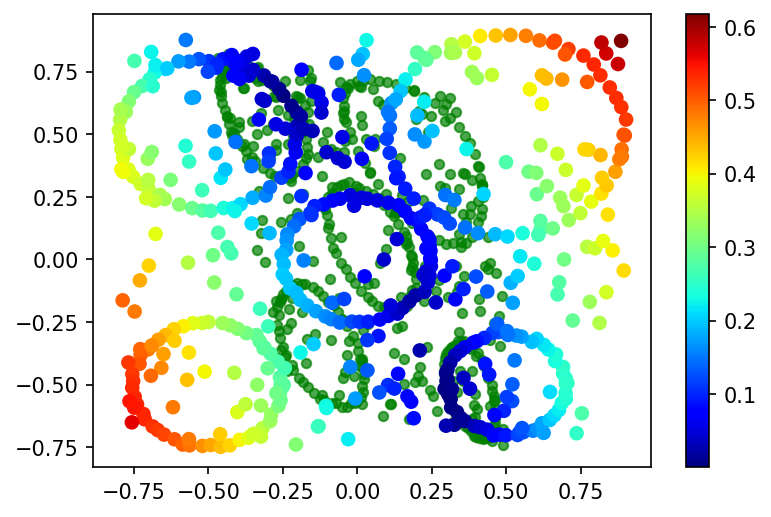

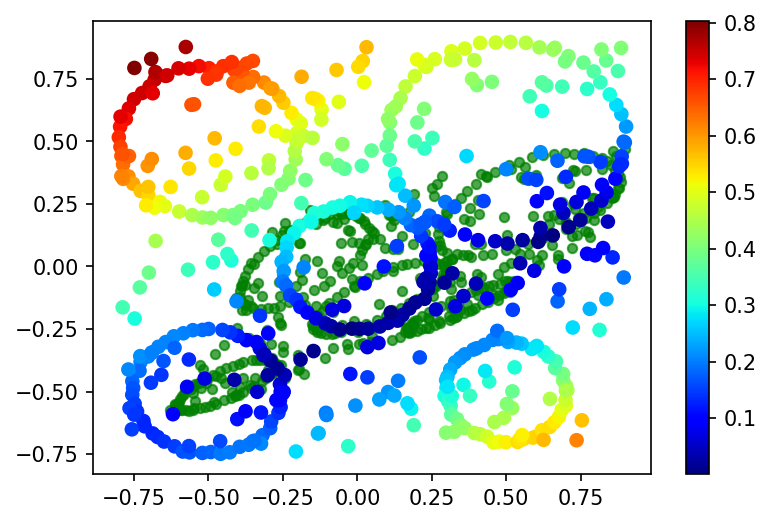

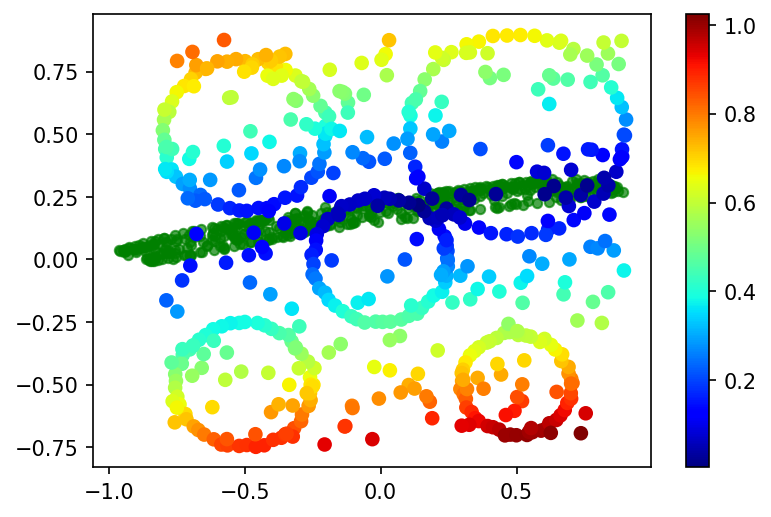

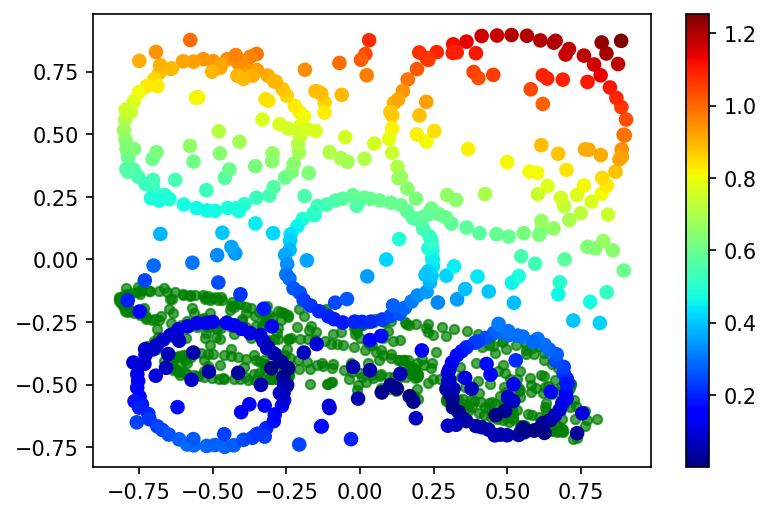

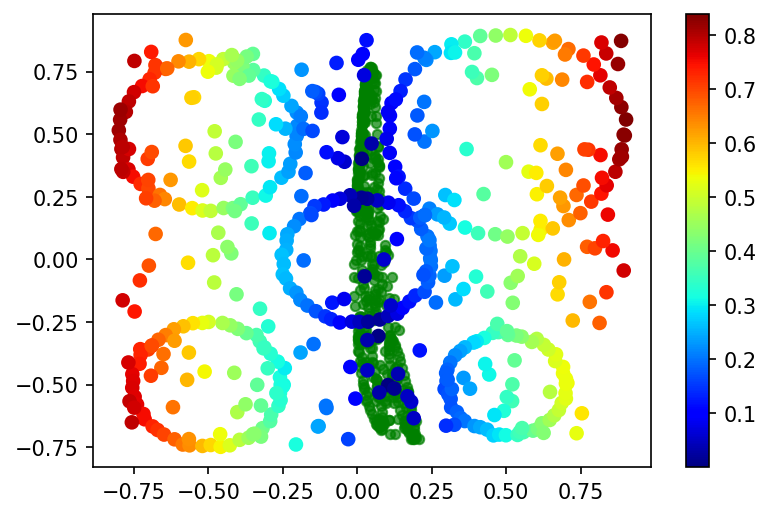

In [21]:
for i, model in enumerate(sac.models[:10]):
    scores = model.get_residuals(data=ds)
    plot(model.predict(ds), new_fig=True, c='g')
    plt.scatter(ds[:, 0], ds[:, 1], c=scores, cmap="jet")
    plt.colorbar()


252


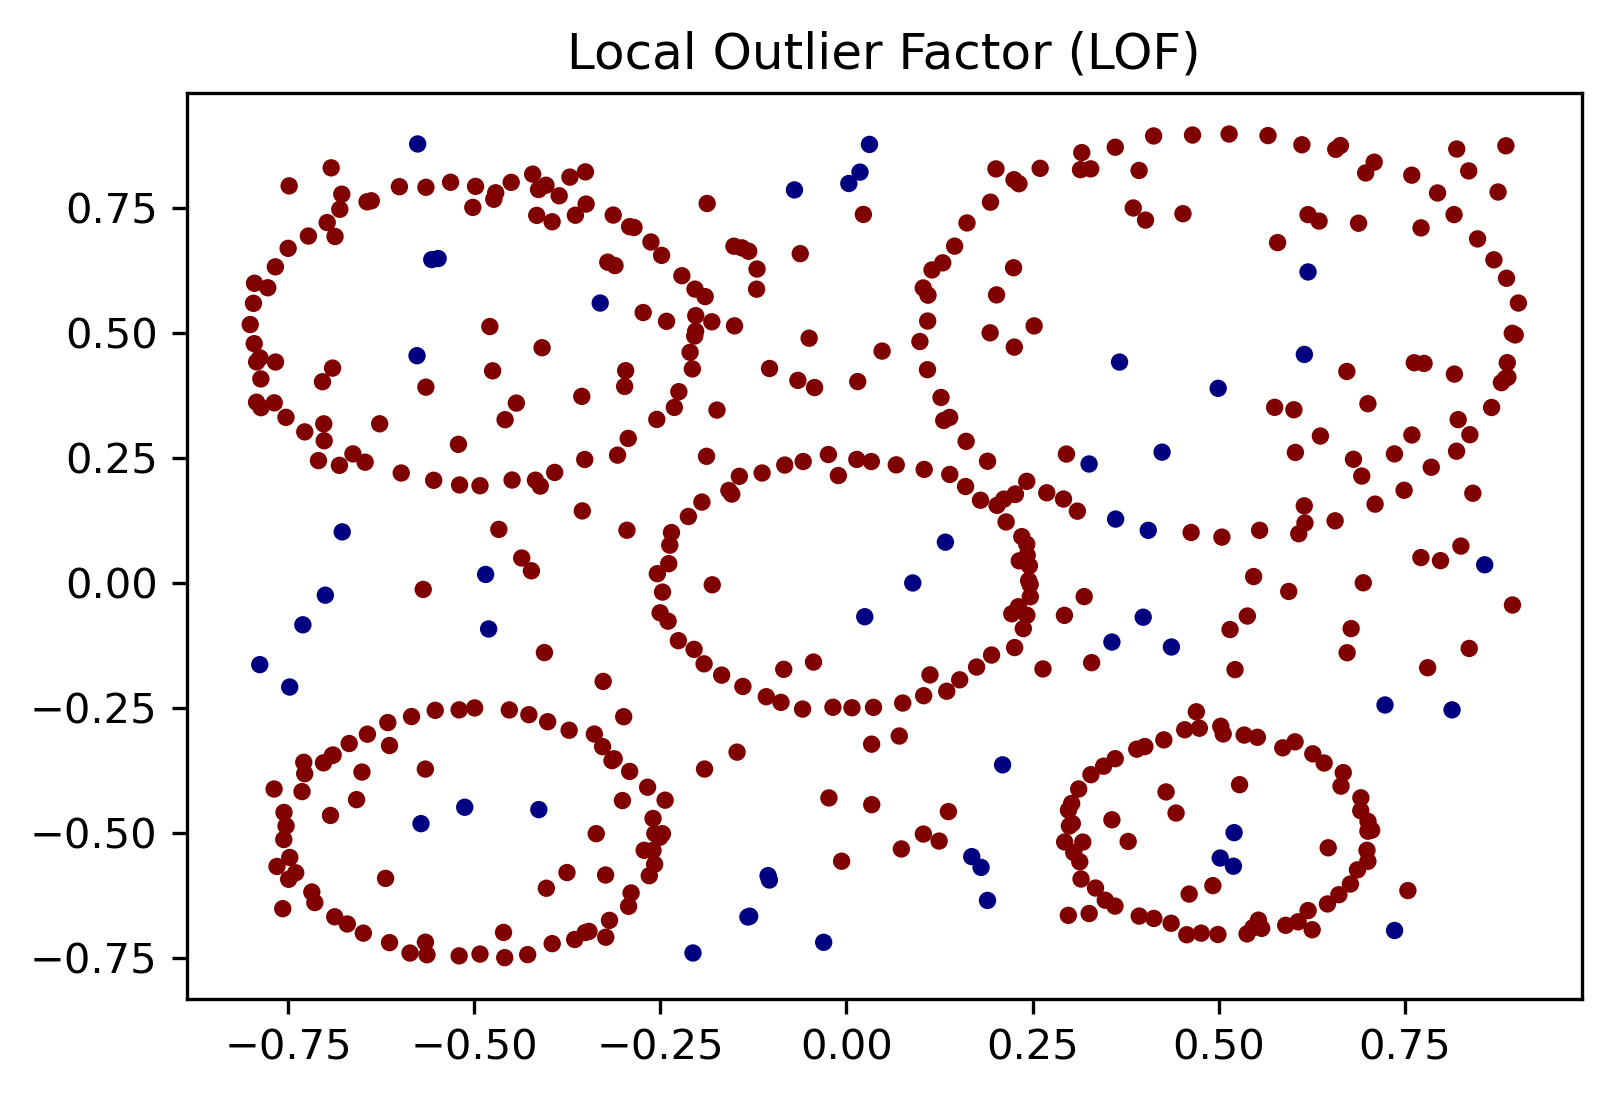

In [22]:
from sklearn.neighbors import LocalOutlierFactor as LOF
X = ds
clf = LOF(n_neighbors=10, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)

# y_pred[y_pred==-1] = 10
# y_pred[y_pred==1] = 0
# y_pred[y_pred==10] = 1

n_errors = (y_pred != gt).sum()
X_scores = clf.negative_outlier_factor_
print(n_errors)
plt.figure(dpi=300)
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="jet", s=10, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# plt.scatter(
#     X[:, 0],
#     X[:, 1],
#     s=1000 * radius,
#     edgecolors="r",
#     facecolors="none",
#     label="Outlier scores",
# )
# plt.axis("tight")
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# plt.xlabel("prediction errors: %d" % (n_errors))
# legend = plt.legend(loc="upper left")
# legend.legendHandles[0]._sizes = [10]
# legend.legendHandles[1]._sizes = [20]
# plt.show()

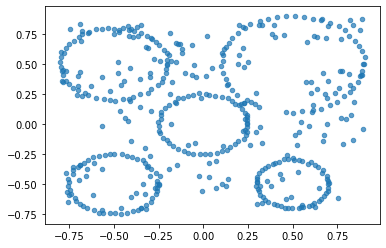

In [23]:
plot(ds[y_pred==1])

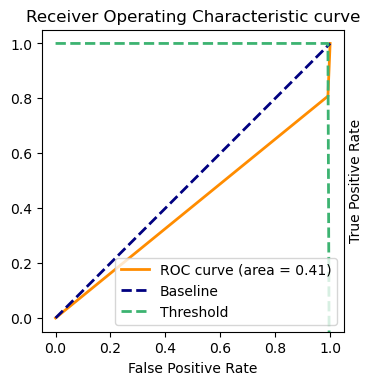

In [24]:
make_roc(gt, y_pred);